In [1]:
import numpy as np # It provides efficient data structures for handling large arrays and matrices
import pandas as pd # used for data manipulation(tabular data)
import nltk #(Natural Language Toolkit(atural language processing(tokenization, stemming))
from nltk.corpus import stopwords # module common words Natural Language (as,is ,and)
from nltk.stem import WordNetLemmatizer #module provides functionality for lemmatizing words in natural language processing(dogs to dog). 
import gensim.downloader as api # which are useful for various NLP tasks like text classification, sentiment analysis
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer #used to ensure that all input sequences have the same length.
from keras_preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
#import the libraries and download the necessary data:
nltk.download('stopwords')#This line downloads the NLTK stopwords(and ,is ,a)
nltk.download('wordnet')#This line downloads the WordNet , which is a lexical database for the English (nouns, verbs, adjectives and adverbs )

stop_words = stopwords.words('english') # used retrieves the list of English stopwords from NLTK and remove move common words from text
lemmatizer = WordNetLemmatizer()#helpful for text normalization and improving text analysis.create object lemmatizer
glove_vectors = api.load("glove-wiki-gigaword-300")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def get_embedding(word):
    try:
        return glove_vectors[word] #returns the corresponding pre-trained GloVe word embedding vector for that word. 
    except KeyError:
        return None # is not present in the glove_vectors object

In [7]:
#define your functions for text preprocessing:
def preprocess_text(text):
    text = text.lower()#This line converts the text to lowercase
    text = " ".join([word for word in text.split() if word not in stop_words]) #this line splits the text into individual words then iterates over each word if the word is not present 
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])#This line splits the preprocessed text into individual words then then applies lemmatization to each word 
    return text

In [8]:
 # load and preprocess your data: 
data = pd.read_csv(r"C:\Users\DELL\Downloads\archive (5)\eng_dataset.csv")#his line reads a CSV file called "emotions.csv" into a Pandas DataFrame named data. The CSV file presumably contains text data and corresponding emotion labels.
# data= data.sample(frac=1)
data

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...
...,...,...,...
7097,40781,sadness,@VivienLloyd Thank you so much! Just home - st...
7098,40782,sadness,Just put the winter duvet on ☃️❄️🌬☔️
7099,40783,sadness,@SilkInSide @TommyJoeRatliff that's so pretty!...
7100,40784,sadness,@BluesfestByron second artist announcement loo...


In [9]:
data.shape

(7102, 3)

In [10]:
data['sentiment'].loc[data['sentiment']=='anger']=0.0
data['sentiment'].loc[data['sentiment']=='fear']=1.0
data['sentiment'].loc[data['sentiment']=='joy']=2.0
data['sentiment'].loc[data['sentiment']=='sadness']=3.0
data['sentiment']=np.asanyarray(data['sentiment']).astype('float64')

data

C:\Users\DELL\AppData\Local\Temp\ipykernel_21308\2892790010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'].loc[data['sentiment']=='anger']=0.0
C:\Users\DELL\AppData\Local\Temp\ipykernel_21308\2892790010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'].loc[data['sentiment']=='fear']=1.0
C:\Users\DELL\AppData\Local\Temp\ipykernel_21308\2892790010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,ID,sentiment,content
0,10941,0.0,At the point today where if someone says somet...
1,10942,0.0,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,0.0,This game has pissed me off more than any othe...
3,10944,0.0,@spamvicious I've just found out it's Candice ...
4,10945,0.0,@moocowward @mrsajhargreaves @Melly77 @GaryBar...
...,...,...,...
7097,40781,3.0,@VivienLloyd Thank you so much! Just home - st...
7098,40782,3.0,Just put the winter duvet on ☃️❄️🌬☔️
7099,40783,3.0,@SilkInSide @TommyJoeRatliff that's so pretty!...
7100,40784,3.0,@BluesfestByron second artist announcement loo...


In [11]:
data["contnet"] = data["content"].apply(preprocess_text)#It preprocesses the text data by converting it to lowercase, removing stopwords, and performing lemmatization

x_train,x_test,y_train,y_test=train_test_split(data['content'],
                                               data['sentiment'],
                                              test_size=0.2,
                                               random_state=2,
                                              )
y_test.value_counts()

1.0    466
0.0    348
2.0    313
3.0    294
Name: sentiment, dtype: int64

In [12]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(x_train)
x_train_sequences = tokenizer.texts_to_sequences(x_train)
max_len = max([len(seq) for seq in x_train_sequences])#This line calculates the maximum length of the sequences, 
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_len, padding='post')

x_test_sequences=tokenizer.texts_to_sequences(x_test)
x_test_padded = pad_sequences(x_test_sequences,maxlen=max_len, padding='post')


x_test_padded.shape

(1421, 36)

In [13]:
word_index = tokenizer.word_index

In [14]:
embedding_dim = 300 #This line sets the dimensionality of the word embeddings to 100.
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = get_embedding(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector   


In [18]:

train_size = int(data.shape[0]*0.8)

In [19]:
#define and train your model:

model1 = Sequential([
    Embedding(len(word_index) + 1, embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=2)

history = model1.fit(x_train_padded, y_train, epochs=50, validation_data=(x_test_padded,y_test), callbacks=[early_stopping])

Epoch 1/50
178/178 [==============================] - 32s 145ms/step - loss: 1.5650 - accuracy: 0.2603 - val_loss: 1.3852 - val_accuracy: 0.3279
Epoch 2/50
178/178 [==============================] - 26s 147ms/step - loss: 1.4365 - accuracy: 0.2823 - val_loss: 1.3702 - val_accuracy: 0.3279
Epoch 3/50
178/178 [==============================] - 25s 140ms/step - loss: 1.4047 - accuracy: 0.2957 - val_loss: 1.2610 - val_accuracy: 0.4349
Epoch 4/50
178/178 [==============================] - 26s 144ms/step - loss: 1.2452 - accuracy: 0.4339 - val_loss: 1.1090 - val_accuracy: 0.4856
Epoch 5/50
178/178 [==============================] - 25s 141ms/step - loss: 1.1317 - accuracy: 0.4756 - val_loss: 1.0430 - val_accuracy: 0.5032
Epoch 6/50
178/178 [==============================] - 25s 140ms/step - loss: 1.0296 - accuracy: 0.5159 - val_loss: 0.9392 - val_accuracy: 0.5567
Epoch 7/50
178/178 [==============================] - 25s 138ms/step - loss: 0.9278 - accuracy: 0.5774 - val_loss: 0.8624 - val_ac

In [20]:
model1.save('emotion_classifier1.h5')

In [21]:
#define and train your model:

model2 = Sequential([
    Embedding(len(word_index) + 1, embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False),
    LSTM(32),
    Dense(32, activation='linear'),
    Activation('softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train_padded, y_train, epochs=30, validation_data=(x_test_padded,y_test))
model2.save('emotion_classifier2.h5')

Epoch 1/30
178/178 [==============================] - 13s 38ms/step - loss: 1.7765 - accuracy: 0.2936 - val_loss: 1.3911 - val_accuracy: 0.3279
Epoch 2/30
178/178 [==============================] - 6s 32ms/step - loss: 1.3672 - accuracy: 0.3429 - val_loss: 1.2599 - val_accuracy: 0.4490
Epoch 3/30
178/178 [==============================] - 6s 32ms/step - loss: 1.1712 - accuracy: 0.4784 - val_loss: 1.1028 - val_accuracy: 0.4954
Epoch 4/30
178/178 [==============================] - 5s 28ms/step - loss: 1.0400 - accuracy: 0.5119 - val_loss: 0.9999 - val_accuracy: 0.5278
Epoch 5/30
178/178 [==============================] - 6s 31ms/step - loss: 0.8527 - accuracy: 0.6508 - val_loss: 0.8133 - val_accuracy: 0.6784
Epoch 6/30
178/178 [==============================] - 5s 31ms/step - loss: 0.7140 - accuracy: 0.7279 - val_loss: 0.7268 - val_accuracy: 0.7192
Epoch 7/30
178/178 [==============================] - 5s 30ms/step - loss: 0.6230 - accuracy: 0.7717 - val_loss: 0.6625 - val_accuracy: 0.750

45/45 [==============================] - 1s 25ms/step


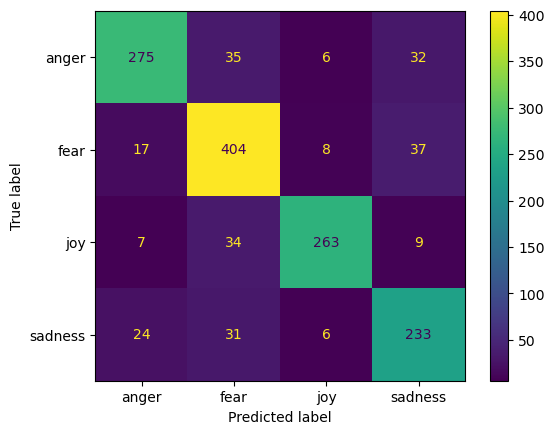

Model 1
Accuracy Score 0.8268824771287826
Percision Score[0.85139319 0.8015873  0.92932862 0.74919614]
Recall Score[0.79022989 0.86695279 0.84025559 0.79251701]
F1 Score[0.81967213 0.83298969 0.88255034 0.77024793]
45/45 [==============================] - 1s 10ms/step


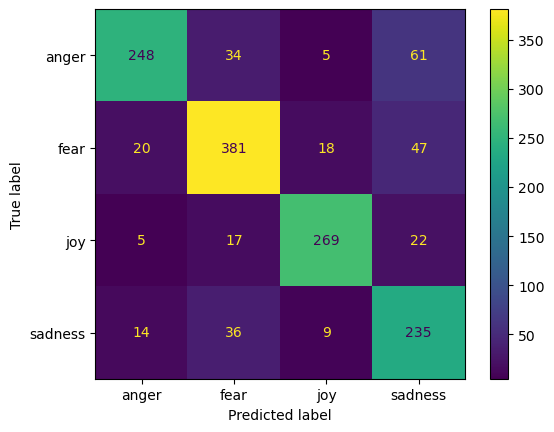

Model 2
Accuracy Score 0.7973258268824771
Percision Score[0.8641115  0.81410256 0.89368771 0.64383562]
Recall Score[0.71264368 0.81759657 0.85942492 0.79931973]
F1 Score[0.78110236 0.81584582 0.8762215  0.71320182]


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Model 1

y_prediction=model1.predict(x_test_padded)

emotion_labels = ["anger", "fear",  "joy", "sadness"]
y_test.loc[y_test==0.0]='anger'
y_test.loc[y_test==1.0]='fear'
y_test.loc[y_test==2.0]='joy'
y_test.loc[y_test==3.0]='sadness'
# y_prediction_emotion = emotion_labels[np.argmax(y_prediction)]
y_prediction_emotion=[]
for y in y_prediction:
    prediction=emotion_labels[np.argmax(y)]
    y_prediction_emotion.append(prediction)
cm=confusion_matrix(y_test,y_prediction_emotion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=emotion_labels)
disp.plot()
plt.show()
print("Model 1")
print("Accuracy Score "+str(accuracy_score(y_test,y_prediction_emotion)))

print("Percision Score"+str(precision_score(y_test,y_prediction_emotion,
                                            labels=emotion_labels,
                                            average=None
                                            )))
print("Recall Score"+str(recall_score(y_test,y_prediction_emotion,
                                            labels=emotion_labels,
                                            average=None
                                            )))
print("F1 Score"+str(f1_score(y_test,y_prediction_emotion,
                                            labels=emotion_labels,
                                            average=None
                                            )))
#Model 2

y_prediction=model2.predict(x_test_padded)

emotion_labels = ["anger", "fear",  "joy", "sadness"]
y_test.loc[y_test==0.0]='anger'
y_test.loc[y_test==1.0]='fear'
y_test.loc[y_test==2.0]='joy'
y_test.loc[y_test==3.0]='sadness'
# y_prediction_emotion = emotion_labels[np.argmax(y_prediction)]
y_prediction_emotion=[]
for y in y_prediction:
    prediction=emotion_labels[np.argmax(y)]
    y_prediction_emotion.append(prediction)
cm=confusion_matrix(y_test,y_prediction_emotion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=emotion_labels)
disp.plot()
plt.show()
print("Model 2")
print("Accuracy Score "+str(accuracy_score(y_test,y_prediction_emotion)))

print("Percision Score"+str(precision_score(y_test,y_prediction_emotion,
                                            labels=emotion_labels,
                                            average=None
                                            )))
print("Recall Score"+str(recall_score(y_test,y_prediction_emotion,
                                            labels=emotion_labels,
                                            average=None
                                            )))
print("F1 Score"+str(f1_score(y_test,y_prediction_emotion,
                                            labels=emotion_labels,
                                            average=None
                                            )))


In [23]:
from tensorflow.keras.models import load_model
loaded_model = load_model('emotion_classifier.h5')
loaded_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 36, 300)           4517100   
                                                                 
 lstm_11 (LSTM)              (None, 32)                42624     
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 activation_11 (Activation)  (None, 32)                0         
                                                                 
Total params: 4,560,780
Trainable params: 43,680
Non-trainable params: 4,517,100
_________________________________________________________________


In [198]:
emotion_labels = ["anger", "fear",  "joy", "sadness"]


In [296]:
def make_prediction(text):
    text = preprocess_text(text)# converts the text to lowercase, removes stopwords, and performs lemmatization.
    test_sequence = tokenizer.texts_to_sequences([text])#This line converts the preprocessed test text into a sequence of integers
    test_padded_sequence = pad_sequences(test_sequence, maxlen=max_len, padding='post')#maximum sequence length 
    prediction = loaded_model.predict(test_padded_sequence)[0]#his line passes the padded test sequence through the trained model using the predict method. It returns a predicted probability distribution over the 8 emotion classes.
    emotion_labels = ["anger", "fear",  "joy", "sadness"]
    predicted_emotion = emotion_labels[np.argmax(prediction)]#retrieve the corresponding emotion label
    print(predicted_emotion)